# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). For your convenience, you can review the descriptions of the data columns from [here](data-description.txt).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

#### First, import the basic libraries and the dataset.

In [1]:
import numpy as np
import pandas as pd
#we avoid copy warning when creating new columns from existing data
pd.options.mode.chained_assignment = None 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

df = pd.read_csv('housing_prices.csv')

/home/diego/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [2]:
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You find the dataset has 81 columns which are a lot. 

#### Since the column `Id` is meaningless in our data visualization work, let's drop it

In [3]:
# your code here
df = df.drop(columns=["Id"])
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of your output looks like:

![Missing Values](missing-values.png)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [4]:
# your code here
df_check = df.isnull().mean()*100
df_check[df_check>20]

Alley          93.767123
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have 75 columns now.

In [5]:
#we get rid of the 5 previous columns --> + 20% of null vals
df = df = df.loc[:, df.isnull().mean() < .2]
df.shape

(1460, 75)

Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

In [6]:
# your code here
"""df.SalePrice.plot(kind="hist", bins=100, figsize=(15,5))"""

'df.SalePrice.plot(kind="hist", bins=100, figsize=(15,5))'

It is more clear with sns as we can see the line of the frequency distribution

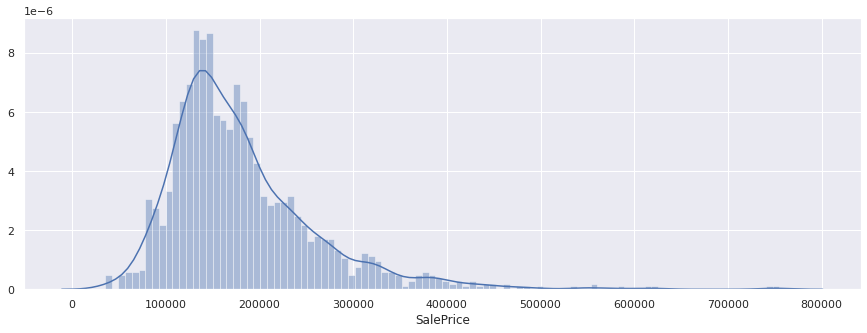

In [7]:
plt.figure(figsize=(15,5))
sns.distplot(df.SalePrice, bins=100)

From the graphs below we can infer that our distribution is right skewed or positive skewed as the long tail is in the right.
Also for a distribution to be "nomal", must be symmetric, which means mean=median=mode, and this in not the case

In [8]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

As we see there is a huge diff between min 35k and max 755k, being the mean aroun 181k much closer to the Q3 than Q1 and indicating there are some big outliers

In [9]:
#we reckeck the skewness cofirming a positive/right skewness
df.SalePrice.skew()

1.8828757597682129

## Bonus Challenge 1 - Adjust Data Distribution

If you used the correct method in the previous step, you should have found the data distribution is skewed to the left. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the sale price.

*This technique is optional in data visualization but you'll find it useful in your future machine learning analysis.*

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted sale price.**

[This reference](https://trainingdatascience.com/workshops/histograms-and-skewed-data/) shows you examples on how to adjust skewed data.

As we saw before, the column data we are dealing with is right skewed and our idea is to make it symmetric or normally distributed. So skewness = 0

The most used formulas to normalize are the min-max fn and the z score.

Also, for right skw data it is frequently used sqrt, log and cube root functions.

So we will use all of them and choose the best one

In [10]:
#we define min-max normalize, z score and cube root

def minMax(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

def zScore(column):
    x = column
    avg = np.mean(column)
    std = np.std(column)
    return (x-avg)/std

def cubeR(column):
    return column**(1/3)

# 1. Adjusting data 1st try

In [11]:
"""SalePrice_m = minMax(df.SalePrice)
SalePrice_m.describe()"""

'SalePrice_m = minMax(df.SalePrice)\nSalePrice_m.describe()'

In [12]:
"""plt.figure(figsize=(15,5))
sns.distplot(SalePrice_m, bins=100)"""

'plt.figure(figsize=(15,5))\nsns.distplot(SalePrice_m, bins=100)'

In [13]:
"""SalePrice_m.skew()"""

'SalePrice_m.skew()'

As we can see the max min fn just make our vals to be between 0-1, but it has the same skw as before

# 2. Adjusting data 2nd try

In [14]:
"""SalePrice_z = zScore(df.SalePrice)
SalePrice_z.describe()"""

'SalePrice_z = zScore(df.SalePrice)\nSalePrice_z.describe()'

In [15]:
"""plt.figure(figsize=(15,5))
sns.distplot(SalePrice_z, bins=100)"""

'plt.figure(figsize=(15,5))\nsns.distplot(SalePrice_z, bins=100)'

In [16]:
"""SalePrice_z.skew()"""

'SalePrice_z.skew()'

As we can see the z score is worse than max min fn to normalize our data, as the skw is the same and the falls between -2 and 7

# 3. Adjusting data 3rd try

In [17]:
SalePrice_log = np.log(df.SalePrice)
SalePrice_log.describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

In [18]:
"""plt.figure(figsize=(15,5))
sns.distplot(SalePrice_log, bins=100)"""

'plt.figure(figsize=(15,5))\nsns.distplot(SalePrice_log, bins=100)'

In [19]:
"""SalePrice_log.skew()"""

'SalePrice_log.skew()'

After applying the log fn we see the data much more symmetric than before and skewness almost 0, however the mean and the median are still not equal, so lets do more tests

# 4. Adjusting data 4th try

In [20]:
"""SalePrice_sqrt = np.sqrt(df.SalePrice)
SalePrice_sqrt.describe()"""

'SalePrice_sqrt = np.sqrt(df.SalePrice)\nSalePrice_sqrt.describe()'

In [21]:
"""plt.figure(figsize=(15,5))
sns.distplot(SalePrice_sqrt, bins=100)"""

'plt.figure(figsize=(15,5))\nsns.distplot(SalePrice_sqrt, bins=100)'

In [22]:
"""SalePrice_sqrt.skew()"""

'SalePrice_sqrt.skew()'

Our results are worse than the log fn, so we will keep trying

# 5. Adjusting data 5th try

In [23]:
"""SalePrice_c = cubeR(df.SalePrice)
SalePrice_c.describe()"""

'SalePrice_c = cubeR(df.SalePrice)\nSalePrice_c.describe()'

In [24]:
"""plt.figure(figsize=(15,5))
sns.distplot(SalePrice_c, bins=100)"""

'plt.figure(figsize=(15,5))\nsns.distplot(SalePrice_c, bins=100)'

In [25]:
"""SalePrice_c.skew()"""

'SalePrice_c.skew()'

We see a better performance than sqrt fn but worse than log fn

# 6. Combine the best perfomances

In [26]:
SalePriceAdjusted = minMax(SalePrice_log)
SalePriceAdjusted.describe()

count    1460.000000
mean        0.508683
std         0.129936
min         0.000000
25%         0.427702
50%         0.501349
75%         0.589900
max         1.000000
Name: SalePrice, dtype: float64

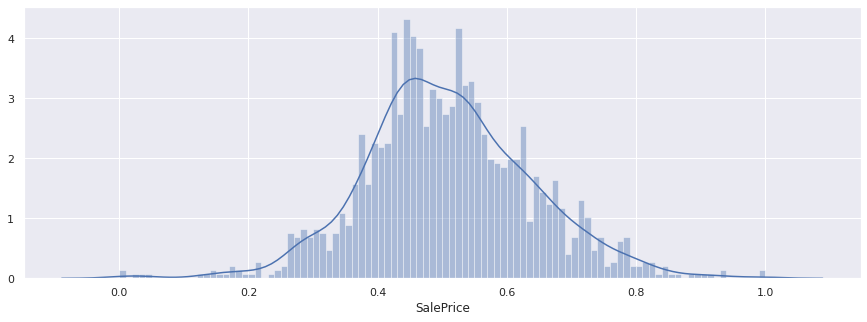

In [27]:
plt.figure(figsize=(15,5))
sns.distplot(SalePriceAdjusted, bins=100)

In [28]:
SalePriceAdjusted.skew()

0.12133506220520805

As we see combining the max min fn plus the log fn is the best way to make our data almost symmetric, with skewness close to 0, vals between 0 and 1 and the median and mean almost equal

## Challenge 2 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).

* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).

* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above. 

Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

In [29]:
df["SalePriceAdjusted"] = SalePriceAdjusted

In [30]:
#sum all baths
df["AllBaths"] = df[["FullBath","HalfBath","BsmtFullBath","BsmtHalfBath"]].sum(axis=1)

In [31]:
#years of house and its remodelation
df["HouseYears"] = [2020-e for e in df.YearBuilt]
df["RemoYears"] = [2020-e for e in df.YearRemodAdd]

In [32]:
df_corr = df[["SalePriceAdjusted","GrLivArea","LotArea","GarageArea","BedroomAbvGr","KitchenAbvGr","AllBaths","Neighborhood","HouseYears","RemoYears"]]

Text(0.5, 1.0, 'Correlation matrix')

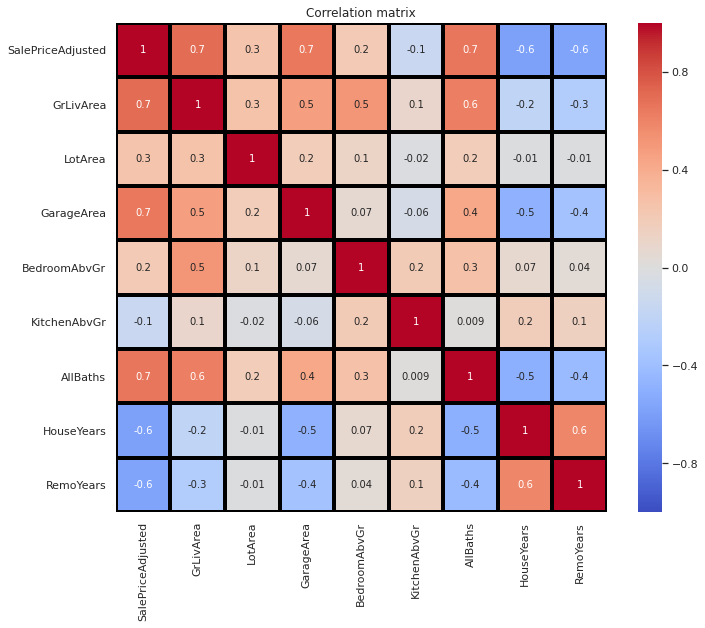

In [33]:
plt.figure(figsize=(11,9))

sns.heatmap(df_corr.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm' , linewidths=3, linecolor='black')

plt.title('Correlation matrix')

The idea is to check the corr between SalePriceAdjusted and the rest of all these columns. So from now on we will describe the lineal relation for the ones with a corr higher than -0.5/0.5

- GrLivArea: corr of 0.7, it a big linear relation and as it is positive, while GrLivArea increases SalePriceAdjusted increases too.
- GarageArea: "previous decription"
- AllBaths: "previous decription"

- HouseYears: -0.6, it indicates mid-high relation with SalePriceAdjusted and it is negative. Which means when one of them increases the one decreases and viceversa. Older house == Cheaper house
- RemoYears: "previous decription"

## Bonus Challenge 2 - Exploring Data with Correlation Heatmap

Now you have explored data visualizations with certain fields based on common sense. In the dataset there are many other fields that you are not sure whether they are important factors for the sale price. What is the best way to explore those fields without investigating them individually?

Making scatter matrix is not an option here because there are too many fields which makes it extremely time consuming to create scatter matrix. One option you have is to create a heatmap. Heatmaps are much less expensive to create than scatter matrixes. You can use heatmaps to visualize the pairwise correlations between each two variables.

Here is a [reference](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) you can use to learn how to creat the pairwise correlation heatmap. Your heatmap should look like below:

![Corr Heatmap](heatmap.png)

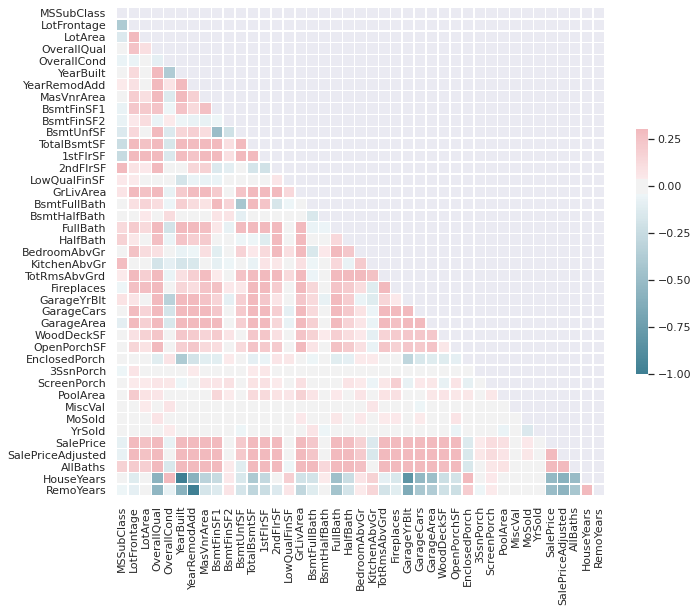

In [34]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In your heatmap, you can easily identify the highly correlated (either positively or negatively) variables by looking for the grids with darker colors. 

#### In the cell below, summarize what variables are highly correlated to the sale price?

Ignoring the relations between the new columns created for the previos heatmap and their constructor columns (ex = HouseYears --> YearBuilt), the most corr columns and relevant corrs are the following:

- HouseYears & RemoYears with OverallQual: the 1st two have almost -1 corr with the quality of the house, whichs means older = less quality
- HouseYears & RemoYears with SalePrice: the older the cheaper

The rest of corr are either small or not relevant for the analysis

## Challenge 3 - Present Your Stories

Now based on your findings from the explorations, summarize and present your stories.

#### Present the top 5 factors that affect the sale price.

Use the following format to present each factor:

1. A title line about the factor.

1. No more than 3 sentences to describe the relationship between the factor and the sale price.

1. Support your point with the appropriate graph.

# 1. Living Area Square Feet

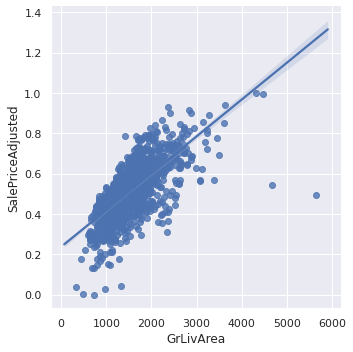

In [35]:
sns.lmplot("GrLivArea", "SalePriceAdjusted", data=df, height=5, robust=True)

The previous graph indicates a positive hig corr between the 2 columns. 

We can ensure this high lineal relation between both due to the dots are almost all toguether and following an scalar positive increase in price and size of the living area. 

Also due to we have previously normalized the sales price, we can set 4k square feet = 1, infering that, as an avg, each 1k of less square feet, the price of the house will decrease in 0.2.

# 2. Garage Area

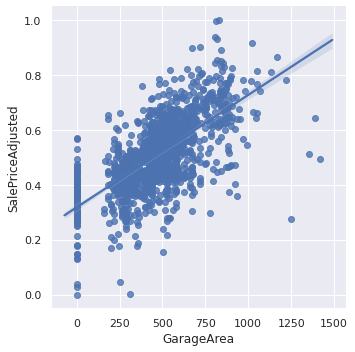

In [36]:
sns.lmplot("GarageArea", "SalePriceAdjusted", data=df, height=5, robust=True)

Although the garage area has a big corr with the sales price too, we can see it is less than the square feet living and sales price, with the big number of outliers we see down left.

These outliers basically means no garage, which most of the times means a lower price, as well as for houses with small garages. 

# 3. Number of Baths

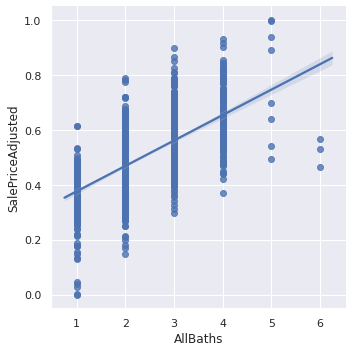

In [37]:
sns.lmplot("AllBaths", "SalePriceAdjusted", data=df, height=5)

The previous graph could have been represented with a barplot too, however would lose the density per number of baths.

We can clearly see a positive linear relation between both columns and also, we can infer that it is really weird find houses with more than 4 baths.

# 4. Years of the House

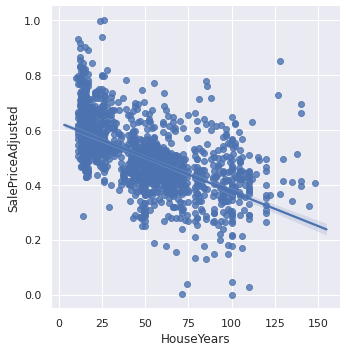

In [38]:
sns.lmplot("HouseYears", "SalePriceAdjusted", data=df, height=5, robust=True)

We see negative relation between both columns; the older the house, the cheaper.

The corr is not that high as the previous ones, as we see many dots far away from the regression line.

# 5. Years since last Remodelation

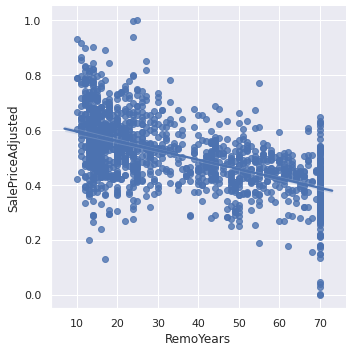

In [39]:
sns.lmplot("RemoYears", "SalePriceAdjusted", data=df, height=5, robust=True)

Finally, with the last graph we can say clearly that remodelating a house increase its value.